# Generate a Histogram Based Noise Model
We will use pairs of noisy observations $x_i$ and clean signal $s_i$ (created by averaging many noisy images) to estimate the conditional distribution $p(x_i|s_i)$.
Note that this noise model is independent of the image content. It is a property of the camera and imaging conditions. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pn2v import histNoiseModel


# The data
To measure your noise model you need pairs of clean and noisy data.
For this dataset we use the training images provided by the authors.
However, the noise model is a characteristic of your camera. The content of these images does not matter, as long as they cover the required range of intensities.

We recommend to simply record 500 images of your slightly closed and defocussed field diaphragm (see 'convallaria-0-CreateNoiseModel' notebook).

(950, 512, 512) (19, 512, 512)


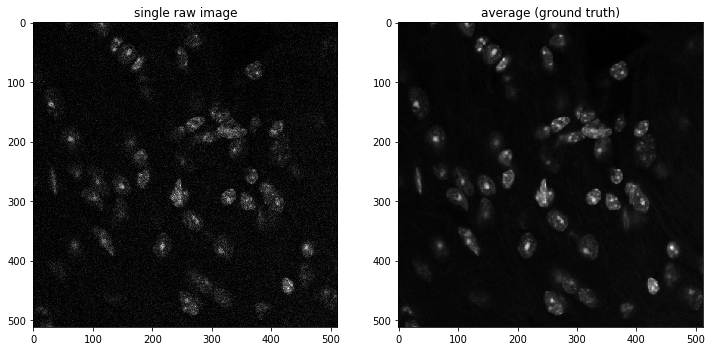

In [2]:
path="data/Confocal_MICE/raw/"

observation= np.load(path+'training_raw.npy')

# The data contains 50 images of a static sample.
# The authors provide the groundturth as the average of the 50 images
signal= np.load(path+'../gt/training_gt.npy')
print(observation.shape, signal.shape)

# Let's look the raw data and our pseudo ground truth signal
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 2)
plt.title(label='average (ground truth)')
plt.imshow(signal[0],cmap='gray')
plt.subplot(1, 2, 1)
plt.title(label='single raw image')
plt.imshow(observation[0],cmap='gray')
plt.show()

### Creating the noise model
Using the raw pixels $x_i$, and our pseudo ground truth $s_i$, we are now creating a 2D histogram. Rows correspond to different signals $s_i$ and columns to different observations $x_i$. The histogram is normalized so that every row sums to one. It describes the distribution $p(x_i|s_i)$ for each $s_i$. This distribution is our noise model.

In [3]:
# We set the range of values we want to cover with our model.
# The pixel intensities in the images you want to denoise have to lie within this range.
# The dataset is clipped to values between 0 and 255.
minVal, maxVal =0, 256
bins = 256

# We are creating the histogram.
# This can take a minute.
histogram = histNoiseModel.createHistogram(bins,minVal,maxVal,observation,signal)

# Saving histogram to disc.
np.save(path+'noiseModel.npy', histogram)

histogram=histogram[0]

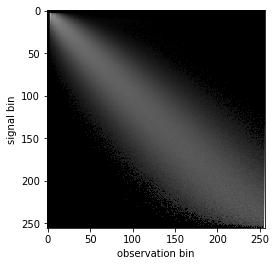

In [4]:
# Let's look at the noise model
plt.xlabel('observation bin')
plt.ylabel('signal bin')
plt.imshow(histogram**0.25, cmap='gray')
plt.show()


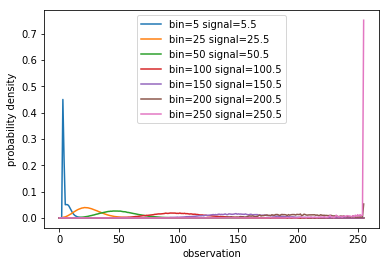

In [5]:
xvals=np.arange(bins)/float(bins)*(maxVal-minVal)+minVal
plt.xlabel('observation')
plt.ylabel('probability density')

# We will now look at the noise distributions for different signals s_i,
# by plotting individual rows of the histogram
# Note that the data is clipped at 255.

index=5
s=((index+0.5)/float(bins)*(maxVal-minVal)+minVal)
plt.plot(xvals,histogram[index,:], label='bin='+str(index)+' signal='+str(np.round(s,2)))

index=25
s=((index+0.5)/float(bins)*(maxVal-minVal)+minVal)
plt.plot(xvals,histogram[index,:], label='bin='+str(index)+' signal='+str(np.round(s,2)))

index=50
s=((index+0.5)/float(bins)*(maxVal-minVal)+minVal)
plt.plot(xvals,histogram[index,:], label='bin='+str(index)+' signal='+str(np.round(s,2)))

index=100
s=((index+0.5)/float(bins)*(maxVal-minVal)+minVal)
plt.plot(xvals,histogram[index,:], label='bin='+str(index)+' signal='+str(np.round(s,2)))

index=150
s=((index+0.5)/float(bins)*(maxVal-minVal)+minVal)
plt.plot(xvals,histogram[index,:], label='bin='+str(index)+' signal='+str(np.round(s,2)))

index=200
s=((index+0.5)/float(bins)*(maxVal-minVal)+minVal)
plt.plot(xvals,histogram[index,:], label='bin='+str(index)+' signal='+str(np.round(s,2)))

index=250
s=((index+0.5)/float(bins)*(maxVal-minVal)+minVal)
plt.plot(xvals,histogram[index,:], label='bin='+str(index)+' signal='+str(np.round(s,2)))

plt.legend()
plt.show()